# Quantum Hall Effect

**Objective.** In this exercise we study the integer quantum Hall effect (IQHE) in a two-dimensional electron gas (2DEG) under a strong perpendicular magnetic field and make explicit its connection to topological phases.

**Why IQHE matters.** Discovered in 1980, the quantum Hall effect (QHE) is one of the most remarkable condensed matter phenomena discovered in the second half of the twentieth century. This precision is not an accident of materials science; it is a manifestation of **topology** in quantum matter. Bulk states carry an integer topological invariant (a Chern number) and, by bulk-boundary correspondence, chiral edge modes produce dissipationless transport. Surprisingly, it provides a new method with which to measure the fine-structure constant with extreme precision in a dirty and disordered solid-state system. But before going quantum, let us revisit the *Hall Effect*

## Classical Hall effect and Drude model (exercise)
**set-up.** A uniform magnetic field $\vec{B} = B_z \hat{z}$ is applied to a 2D electron gas (2DEG) confined to the $(x, y)$-plane. A steady current density $\vec{J} = J_x \hat{x}$ flows along the $\hat{x}$ direction (See Figure below).The Lorentz force on a carrier of charge $q$ and velocity $v$ is
$$ \vec{F} = q\left( \vec{E} + \vec{v} \times \vec{B} \right) $$
In linear response theory, electronic transport and electric field are related by the tensors
$$ J_{\mu} = \sigma_{\mu \nu}E_{\nu} $$
$$ E_{\mu} =\rho_{\mu \nu}J_{\nu} $$

We adopt the convention that $q$ appears explicitly in formulas (so for electrons $q =-e$; for holes $q=+e$ ).
![Hall_Effect](figures/Hall-Effect-Principle.webp)

### Exercise
**(a) Static Hall response (collisionless force balance).**
Assume a steady state with no longitudinal current $J_x=0$ (hence $v_x=0$). Show that the force balance in the $y$  direction implies
$$ \rho_{xy} = \frac{E_y}{J_x} \frac{B_z}{n_e q} $$
given $\vec{J} = n_e q \vec{v}$. Comment on the **sign** for electron-like vs hole-like carriers.

**(b) Drude model with scattering.**
Consider that the system (the 2D electron gas) undergoes collisions with a average time-rate of $\tau$ (*scattering time*). The addition of this average time between collisions defines the model known as **Drude Model**:

$$m \frac{\partial \vec{v}}{\partial t} = -q\left( \vec{E} + \vec{v} \times \vec{B} \right) - \frac{m \vec{v}}{\tau}$$

Derive the full conductivity tensor $\sigma$ and its inverse $\rho$ and show that the Hall resistivity does not depend on the scattering time or other measures of randomness.

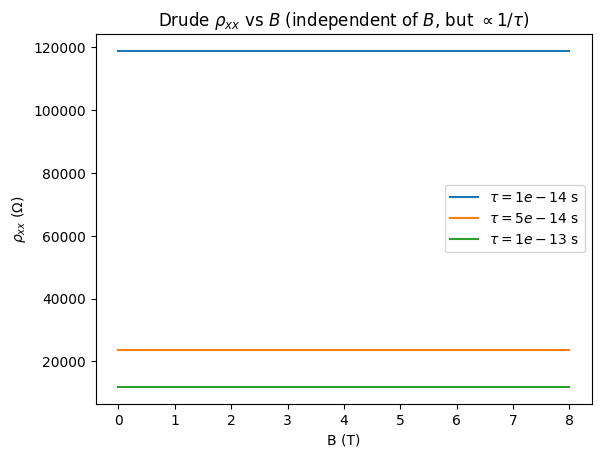

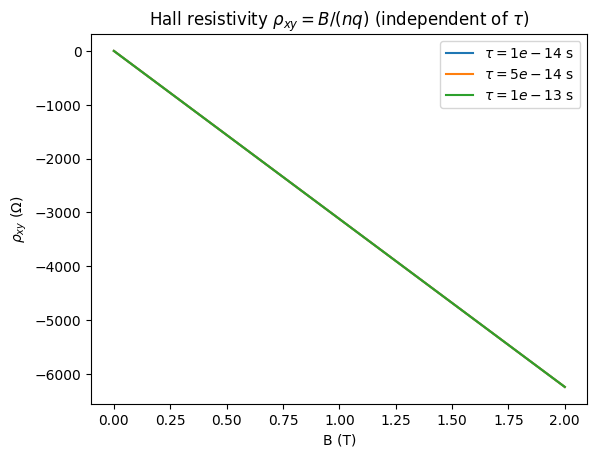

In [3]:
import numpy as np
import matplotlib.pyplot as plt

e = 1.602_176_634e-19
m_e = 9.109_383_7015e-31

# Parameters
n = 2.0e15  # m^-2 (≈ 2e11 cm^-2)
q = -e      # electrons
m = 0.067*m_e  # GaAs-like
taus = [1e-14, 5e-14, 1e-13]  # s
B = np.linspace(0, 8, 200)    # Tesla

def rho_xx(n,q,m,tau):
    sigma0 = n*q*q*tau/m
    return 1.0/sigma0

def rho_xy(n,q,m,B,tau):
    # Hall resistivity: independent of tau
    return B/(n*q)

plt.figure()
for tau in taus:
    plt.plot(B, rho_xx(n,q,m,tau)*np.ones_like(B), label=fr"$\tau={tau:.0e}$ s")
plt.xlabel("B (T)"); plt.ylabel(r"$\rho_{xx}$ (Ω)")
plt.title(r"Drude $\rho_{xx}$ vs $B$ (independent of $B$, but $\propto 1/\tau$)")
plt.legend(); plt.show()

B = np.linspace(0, 2, 200)    # Tesla
plt.figure()
for tau in taus:
    plt.plot(B, rho_xy(n,q,m,B,tau), label=fr"$\tau={tau:.0e}$ s")
plt.xlabel("B (T)"); plt.ylabel(r"$\rho_{xy}$ (Ω)")
plt.title(r"Hall resistivity $\rho_{xy}=B/(n q)$ (independent of $\tau$)")
plt.legend(); plt.show()


## Quantum Hall Effect (QHE): a prelude on periodicity and Bloch’s theorem
The QHE is a quantum phenomenon manifested at **macroscopic** scales (the thermodynamic limit): quantized Hall plateaus are observed in large, disordered samples. Before turning to Landau quantization and topology, we briefly review how periodicity constrains single-particle states in crystals.

![Integer_Hall_Effect](figures/IQHE.png)

### Lattice Periodicity and Translation Symmetry 
Most solids (metals, semiconductors, perovskites, salts, etc.) are built from a periodic repetition of structural units in space. Such materials are **crystals**. In a more mathematical description, for a perfect crystal with discrete translation symmetry, the Hamiltonian is
$$ H = \frac{\vec{p}^2}{2m} + V_L(\vec{r}), \quad \quad \quad \quad  V_L(\vec{r}+\vec{R}) = V_L(\vec{r})$$
where the periodic potential: $V_L(\vec{r})$ can represent the potential of the atomic lattice, and $\vec{R}$ is a *lattice translation vector*. Since the system have a *Translation symmetry*, there exist a unitary operator $T_{\vec{R}}$ that acts on the electronic states as follows:
$$ T_{\vec{R}}\psi(\vec{r}) = \psi(\vec{r}+\vec{R}) $$
Also, it can be shown that, because $H$ has the translation symmetry
$$ T_{\vec{R}}H(\vec{r})\psi(\vec{r}) = H(\vec{r})T_{\vec{R}}\psi(\vec{r}) $$
that is, $\left[ T_{\vec{R}}, H(\vec{r}) \right] = 0$.

Because $T_{\vec{R}}$ commutes with $H(\vec{r})$, one can find a simultaneous electronic eigenstates (note that these are different than the eigenstates wrote above),
$$ H(\vec{r}) \psi = \epsilon \psi, $$
$$ T_{\vec{R}}\psi = c_{\vec{R}} \psi, $$
where $ \epsilon $ and $ c_{\vec{R}} $ are eigenvalues of $ H(\vec{r}) $ and $ T_{\vec{R}} $, and $ |c_{\vec{R}}| = 1 $ (*can you explain/derive why?*). Given the properties of the Translational operator
$$ T_{\vec{R}}T_{\vec{R}'} = T_{\vec{R}'}T_{\vec{R}} = T_{\vec{R}+\vec{R}'}, $$
one can show that the a good *ansatz* to fullfill these equations is by guessing that the eigenvalues of the crystal translation operator can be written as $c_{\vec{R}} = e^{i \vec{k} \cdot \vec{R}}$. Therefore,
$$ H \psi_{\epsilon, \vec{k}} = \epsilon \psi_{\epsilon, \vec{k}}, $$
$$ T_{\vec{R}} \psi_{\epsilon \vec{k} } = e^{ i \vec{k} \cdot \vec{R} } \psi_{ \epsilon \vec{k} },$$
The simultaneous eigenstate of $H$ and $T_{\vec{R}}$ is called the **Bloch state**. The vector number $\vec{k}$, appeared simply at first as phase number, is known as the crystal momentum and has a deeper meaning in solid-state and is a fundamental quantity to understand in periodic system.

If one writes the Bloch state in the following form,
$$ \psi_{\epsilon \vec{k}} = e^{i \vec{k} \cdot \vec{r}}u_{\epsilon \vec{k}}(\vec{r}), $$
then the periodic symmetry stablishes that
$$ u_{\epsilon \vec{k}}(\vec{r} + \vec{R}) = u_{\epsilon \vec{k}}(\vec{r}). $$
That is, a Bloch state is aplane wave times a **cell-periodic function** $u_{\epsilon \vec{k}}(\vec{r})$. *For a deeper discussion and information about this, I strongly recommend to refer to Ashcroft*.


### Exercise

We consider a 2D square Bravais lattice with lattice constant $a$, one $s$-like orbital $\{ \ket{i,j}\}$ per site $(i,j)\in \mathbb{Z}^2$, on-site energy $\epsilon_0$, and nearest-neighbor hopping amplitude $t>0$. The single-particle tight-binding Hamiltonian is
$$ H_{TB} = \sum ^N_{i,j} \epsilon_0 \ket{i,j}\bra{i,j} - \sum ^{N-1}_{i,j}\left( \ket{i+1,j} \bra{i,j} + \ket{i,j+1}\bra{i,j} + hc\right) $$
**(a) Bandstructure $\epsilon(\vec{k})$ of the square lattice.**

**Task** Impose periodic boundary conditions (PBC) on an $N_x \times N_y $ torus and show that the energy dispersion is 
$$\epsilon(k_x,k_y) = \epsilon_0 - 2t\left[ \cos(k_xa) + \cos(k_ya) \right] $$

**Sketch of solution** Use the Bloch/Fourier Transform
$$ \ket{\vec{k}} = \frac{1}{\sqrt{N_x N_y}} \sum_{i,j} e^{i \vec{k} \cdot \vec{R}_{ij}}\ket{i,j} \quad \quad \quad \quad \vec{k} = (k_x,k_y) $$
with $k_x = \frac{2\pi}{N_x a}n_x$ and $k_y = \frac{2\pi}{N_ya}n_y$. (*A consequence of Periodic Boundary Conditions!*) Then replace the Bloch states into the Tight-Binding Hamiltonian $H_{TB}$.


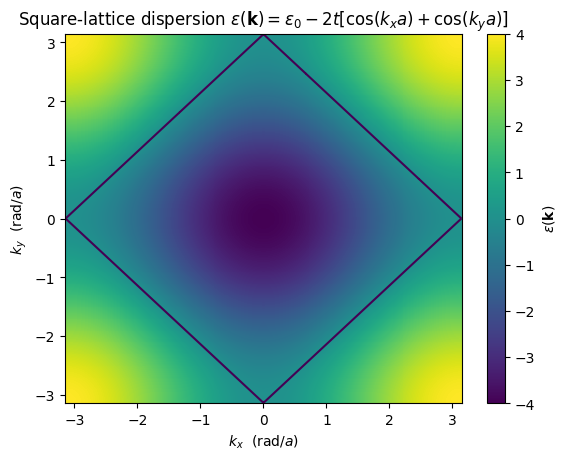

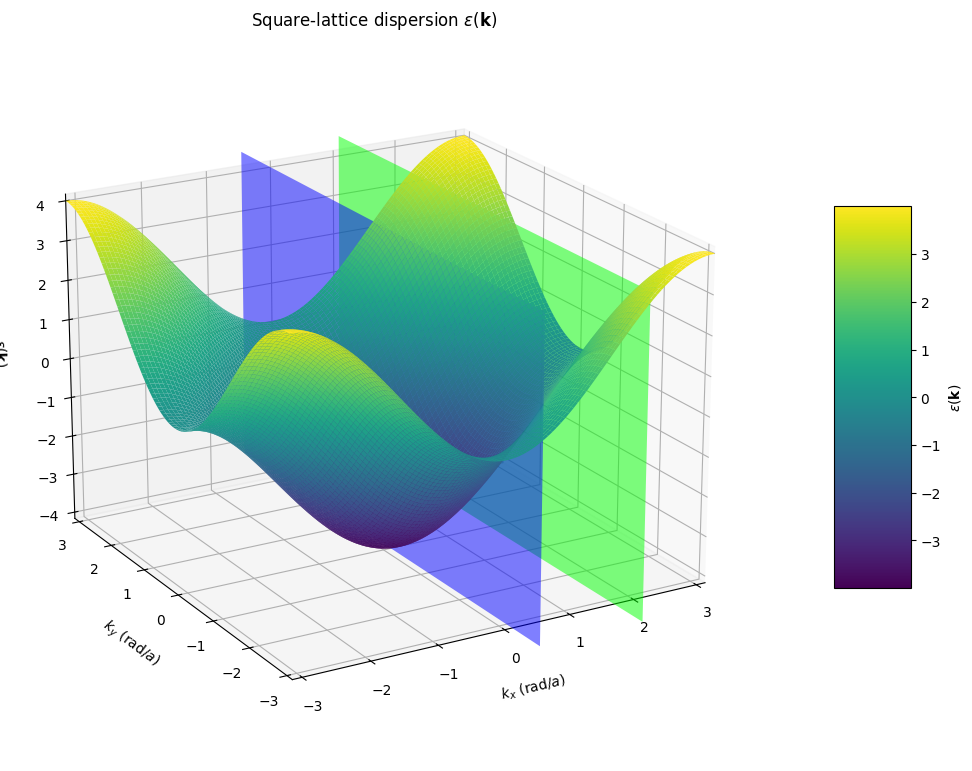

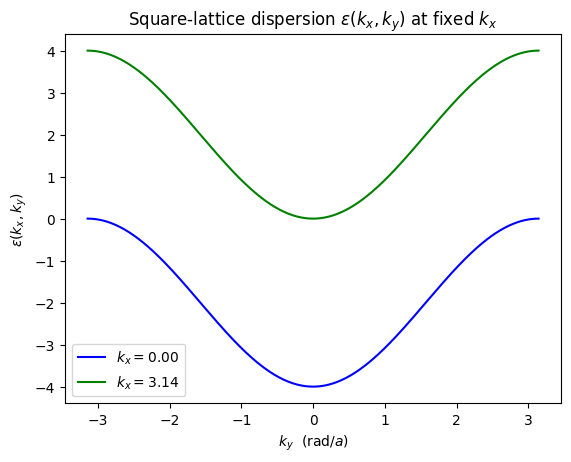

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as mp3d

try:
    from scipy.sparse import lil_matrix, csr_matrix
    SCIPY_AVAILABLE = True
except Exception:
    SCIPY_AVAILABLE = False


# ---------- Model parameters (edit here) ----------
a     = 1.0      # lattice constant
t     = 1.0      # nearest-neighbor hopping (t>0 => band min at Gamma)
eps0  = 0.0      # on-site energy
Nk    = 401      # k-grid per axis for plotting (odd number keeps Gamma on grid)
# --------------------------------------------------


def dispersion_square_lattice(kx, ky, t=1.0, a=1.0, eps0=0.0):
    """
    Square-lattice (1-band, NN) dispersion:
        ε(kx,ky) = ε0 - 2 t [cos(kx a) + cos(ky a)]
    Inputs can be numpy arrays (broadcasting supported).
    """
    return eps0 - 2.0*t*np.cos(kx*a) - 2.0*t*np.cos(ky*a)


def build_hamiltonian_square_lattice(Nx, Ny, t=1.0, eps0=0.0, pbc=True):
    """
    Real-space TB Hamiltonian (CSR sparse) for a 2D square lattice with one
    orbital per site and nearest-neighbor hopping -t.
    Sites are indexed as s = ix + Nx*iy with ix in [0..Nx-1], iy in [0..Ny-1].
    Complexity: O(Nx*Ny). Use small sizes (e.g., <= 10^4 sites) if you plan to diagonalize.

    Returns:
        H (csr_matrix) of shape (Nx*Ny, Nx*Ny)
    """
    if not SCIPY_AVAILABLE:
        raise RuntimeError("SciPy is required for the sparse real-space Hamiltonian.")

    N = Nx * Ny
    H = lil_matrix((N, N), dtype=np.complex128)

    # on-site
    H.setdiag(eps0)

    # helper to map (ix, iy) -> linear index
    def idx(ix, iy):
        return ix + Nx * iy

    # hopping along x
    for iy in range(Ny):
        for ix in range(Nx - 1):
            s  = idx(ix,     iy)
            s2 = idx(ix + 1, iy)
            H[s,  s2] = -t
            H[s2, s ] = -t
        if pbc:
            sL = idx(Nx - 1, iy)
            sR = idx(0,      iy)
            H[sL, sR] = -t
            H[sR, sL] = -t

    # hopping along y
    for ix in range(Nx):
        for iy in range(Ny - 1):
            s  = idx(ix, iy)
            s2 = idx(ix, iy + 1)
            H[s,  s2] = -t
            H[s2, s ] = -t
        if pbc:
            sB = idx(ix, Ny - 1)
            sT = idx(ix, 0)
            H[sB, sT] = -t
            H[sT, sB] = -t

    return H.tocsr()


def plot_dispersion_2D(t=1.0, a=1.0, eps0=0.0, Nk=401, show_fermi=True, ef=None):
    """
    Plot ε(kx,ky) over the first Brillouin zone using pcolormesh.
    If show_fermi=True, overlays the contour ε(k)=εF (default εF=ε0 at half-filling for this model).
    """
    # Brillouin zone
    kmin = -np.pi / a
    kmax =  np.pi / a
    kx = np.linspace(kmin, kmax, Nk)
    ky = np.linspace(kmin, kmax, Nk)
    KX, KY = np.meshgrid(kx, ky, indexing="xy")

    E = dispersion_square_lattice(KX, KY, t=t, a=a, eps0=eps0)

    plt.figure()
    im = plt.pcolormesh(KX, KY, E, shading="auto")
    plt.xlabel(r"$k_x$  ($\mathrm{rad}/a$)")
    plt.ylabel(r"$k_y$  ($\mathrm{rad}/a$)")
    plt.title(r"Square-lattice dispersion $\varepsilon(\mathbf{k})=\varepsilon_0-2t[\cos(k_x a)+\cos(k_y a)]$")
    cbar = plt.colorbar(im)
    cbar.set_label(r"$\varepsilon(\mathbf{k})$")

    if show_fermi:
        if ef is None:
            ef = eps0  # half-filling for the particle-hole symmetric 1-band NN model
        # Overlay a single contour at ε = εF
        cs = plt.contour(KX, KY, E, levels=[ef])
        # no explicit colors/styles set (use matplotlib defaults)

    plt.show()


# ----- Run the 2D dispersion plot -----
plot_dispersion_2D(t=t, a=a, eps0=eps0, Nk=Nk, show_fermi=True, ef=None)

def plot_dispersion_3D(t=1.0, a=1.0, eps0=0.0, Nk=101, filename='square_lattice_dispersion_3D.png'):
    """
    Plot ε(kx,ky) over the first Brillouin zone as a 3D surface.
    """
    # Brillouin zone limits
    kmin = -np.pi / a
    kmax =  np.pi / a
    kx = np.linspace(kmin, kmax, Nk)
    ky = np.linspace(kmin, kmax, Nk)
    KX, KY = np.meshgrid(kx, ky, indexing="xy")

    # Calculate energy
    E = dispersion_square_lattice(KX, KY, t=t, a=a, eps0=eps0)

    # 3D Plotting
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(
        KX, KY, E,
        cmap='viridis',
        edgecolor='none',
        rstride=1,
        cstride=1
    )

    xy = [ (-4, -4, 0),
        ( 4, -4, 0),
        ( 4,  4, 0),
        (-4,  4, 0),
        ]

    yz1 = [ (0, 0-4, -4),
        (0,  4, -4),
        (0,  4,  4),
        (0,  -4,  4),
        ]

    yz2 = [ (np.pi/2, -4, -4),
        (np.pi/2, 4, -4),
        (np.pi/2, 4,  4),
        (np.pi/2,-4,  4),
        ]
    
    # Labels and Title
    ax.set_xlabel(r"$k_x$ ($\mathrm{rad}/a$)", labelpad=10)
    ax.set_ylabel(r"$k_y$ ($\mathrm{rad}/a$)", labelpad=10)
    ax.set_zlabel(r"$\varepsilon(\mathbf{k})$", labelpad=10)
    ax.set_title(r"Square-lattice dispersion $\varepsilon(\mathbf{k})$")

    # Colorbar
    fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1, label=r"$\varepsilon(\mathbf{k})$")

    # Set k-limits
    ax.set_xlim(kmin, kmax)
    ax.set_ylim(kmin, kmax)

    # Adjust view angle for better visualization
    ax.view_init(elev=20, azim=-120)

    face1 = mp3d.art3d.Poly3DCollection([yz1], alpha=0.5, linewidth=1)
    face2 = mp3d.art3d.Poly3DCollection([yz2], alpha=0.5, linewidth=1)
    # face3 = mp3d.art3d.Poly3DCollection([xz], alpha=0.5, linewidth=1)

    # This is the key step to get transparency working
    alpha = 0.5
    face1.set_facecolor((0, 0, 1, alpha))
    face2.set_facecolor((0, 1, 0, alpha))
    # face3.set_facecolor((1, 0, 0, alpha))

    ax.add_collection3d(face1)
    ax.add_collection3d(face2)
    # ax.add_collection3d(face3)

    plt.tight_layout()
    plt.savefig(filename)
    return filename

# ---------- Model parameters (from user's code) ----------
a     = 1.0      # lattice constant
t     = 1.0      # nearest-neighbor hopping (t>0 => band min at Gamma)
eps0  = 0.0      # on-site energy
Nk_3D = 101      # k-grid per axis for plotting
# --------------------------------------------------
# Run the 3D dispersion plot
plot_dispersion_3D(t=t, a=a, eps0=eps0, Nk=Nk_3D)

def plot_dispersion_1D(t=1.0, a=1.0, eps0=0.0, Nk=401, show_fermi=True, ef=None, kx_fixed1=0.0, kx_fixed2=np.pi/a):
    """
    Plot ε(kx,ky) over the first Brillouin zone using pcolormesh.
    If show_fermi=True, overlays the contour ε(k)=εF (default εF=ε0 at half-filling for this model).
    """
    # Brillouin zone
    kmin = -np.pi / a
    kmax =  np.pi / a
    # kx = np.linspace(kmin, kmax, Nk)
    ky = np.linspace(kmin, kmax, Nk)
    # KX, KY = np.meshgrid(kx, ky, indexing="xy")

    E = dispersion_square_lattice(kx_fixed1, ky, t=t, a=a, eps0=eps0)

    plt.figure()
    im = plt.plot(ky, E, color='blue', label=f'$k_x={kx_fixed1:.2f}$')

    E = dispersion_square_lattice(kx_fixed2, ky, t=t, a=a, eps0=eps0)
    im = plt.plot(ky, E, color='green', label=f'$k_x={kx_fixed2:.2f}$')


    # Set k-limits 
    plt.xlabel(r"$k_y$  ($\mathrm{rad}/a$)")
    plt.ylabel(r"$\varepsilon(k_x,k_y)$")
    plt.title(r"Square-lattice dispersion $\varepsilon(k_x,k_y)$ at fixed $k_x$")
    plt.legend()
    plt.show()
# ----- (Optional) Build a small real-space Hamiltonian for testing -----
plot_dispersion_1D(t=1.0, a=1.0, eps0=0.0, Nk=401, show_fermi=True, ef=None, kx_fixed1=0.0, kx_fixed2=np.pi/a)



### Effective Mass-Approximation
In a periodic crystal, single–electron states are Bloch waves with energies $\epsilon_{n}(\vec{k})$. Near a nondegenerate band extremum (typically the bottom of a conduction band-LUMO or the top of a valence band-HOMO), the dispersion can be expanded to quadratic order,
$$ \epsilon_{n \vec{k}} \approx \epsilon_{0} + \frac{h^2}{2} (\vec{k} - \vec{k}_0 )^T \vec{m}^{-1}(\vec{k} - \vec{k}_0), $$
where $\vec{m}$ is the (generally anisotropic) effective-mass tensor. If the extremum is at $\vec{k}_0 = 0$ and the band is isotropic in the plane of interest, $\vec{m} \rightarrow m^*$ and 
$$ \epsilon_{n \vec{k}} \approx \epsilon_{0} + \frac{h^2k^2}{2m^*}, $$
where the energy offset $\epsilon_0$ may be dropped when focusing on dynamics.

**Minimal coupling to a magnetic field (SI units)**
In electromagnetic theory, coupling a charge $q$ to a static uniform magnetic field $\vec{B} = \vec{\nabla} \times \vec{A}$ is implemented by replacing the crystal momentum $\hbar \vec{k}$ with the kinematic momentum,
$$ \hbar \vec{k} \rightarrow \vec{p} - \frac{q}{c} \vec{A}(\vec{r}) $$
so that, in the effective-mass picture,
$$ H_{eff} = \frac{1}{2}(\hat{p}-q\hat{A})^T\vec{m}^-1(\hat{p}-q\hat{A}) $$

### **Peierls substitution**
In a lattice, the additionj of this external fields can be carried out by a phase factor known as the **Peierls substitution**. Assuming a nearest neighbor lattice coupling, similar to the exercise solved above, 
$$ H_{TB} = \hat{T}_x + \hat{T}_y + h.c. $$
where $\hat{T}_x = \sum_{mn} c^{\dagger}_{m+1,n}c_{m,n}$ and $\hat{T}_y = \sum_{mn} c^{\dagger}_{m,n+1}c_{m,n}$ are the translation operators by one lattice in the $x-y$ directions, and $c^{\dagger}_{m,n}$ ($c_{m,n}$) are the one-electron creation (anihiliation) operators in the site $(m,n)$. Note here that we have set $t=1$ and $\epsilon_0 = 0$ for simplicity. However, under a magnetif field applied, these translation operators become
\begin{align}
\hat{T}^P_x & = \sum_{mn} c^{\dagger}_{m+1,n}c_{m,n}e^{i\theta^x_{mn}} \nonumber \\
\hat{T}^P_y & = \sum_{mn} c^{\dagger}_{m,n+1}c_{m,n}e^{i\theta^y_{mn}} \nonumber
\end{align}
Since the Hamiltonian contains only nearest-neighbor terms, the phase factors can be consistently chosen as the integral of the external vector potential over the bond linking the nearest neighbors:
\begin{align}
\theta^x_{mn} & = \frac{e}{\hbar}\int^{m+1}_n \vec{A} \cdot d\vec{x} \nonumber \\
\theta^y_{mn} & = \frac{e}{\hbar}\int^{m+1}_n \vec{A} \cdot d\vec{y} \nonumber
\end{align}
Thus, if we want to know the phase factor acquired after one walk of the unit cell, we obtain:
\begin{align}
\frac{e}{\hbar} \int_{unit\, cell}\vec{A} \cdot d\vec{l} & = 2 \pi \frac{e}{\hbar} \int_{Surf}B dS \nonumber \\
& = 2 \pi \phi_{mn}
\end{align}
where $\phi_{mn}$ is the number of flux quanta in units of the $e/\hbar$.
To see this in a more clear way, we select the Landau gauge, where the vector potential is given by:
$$ \vec{A} = (0, B_x x \hat{y}, 0) $$
the flux quanta along the $y$ axis becomes:
$$ \phi = \frac{\Phi}{\Phi_0} = \frac{B_x a^2}{\hbar / e}$$
Thus, the electron hopping along the $x$ carries no phase, while the hopping along the $y$ direction at $x=ma$ carries a phase $e^{i 2 \pi \phi m}$:
\begin{align}
H_B = \epsilon_0 \sum_{m,n}c^{\dagger}_{m,n}c_{m,n} - t \sum_{m,n} \left[ c^{\dagger}_{m+1,n}c_{m,n} + c^{\dagger}_{m,n+1}c_{m,n}e^{i 2 \pi \phi m} + h.c. \right]
\end{align}

Note that for rational flux $\phi=p/q$ , translation symmetry is restored by enlarging the unit cell to $q$ sites along $x$ (magnetic unit cell). Translation by $q$ sites along $x$ commutes with translation in $y$.


## Exercise
**(a) Magnetic Bloch Hamiltonian (Harper form)** 
From the Hamitlonian written above show that the effective Hamiltonian can be defined in the **magnetic Brillouin zone** $k_x \in \left[ -\pi /qa,\pi /qa \right)$, $k_y \in \left[ -\pi /a,\pi /a \right)$. And, in the basis $n = 0, 1,...,q-1$ (magnetic sublattice), the Hamiltonian reads
$$ H_{n,n'} = \left[\varepsilon_0 - 2t \cos(k_x + 2 \pi \phi n) \right]\delta_{n,n'} - t \left( e^{-i k_y a}\delta_{n+1,n'} + e^{ik_ya} \delta_{n,n'+1} \right)$$
For $\phi =1/3$ or $1/5$, plot the $q$ bands along a cut (e.g., $k_y=0$) and over the 2D magnetic BZ.

**(b) Cylinder geometry and edge bands (bulk–edge correspondence)**
Turn the torus (2D periodic boundary conditions) into a cylinder: keep periodic $x$, open $y$ (width $N_y$). In Landau gauge, $k_x$ remains a good quantum number and the Hamiltonian reduces to the *Harper ribbon*:
\begin{align}
\left(H_{ky} \psi \right)_y = \left[ \varepsilon_0 - 2t \cos(k_x + 2 \pi \phi y) \right] \psi_y - t \left( \psi_{x+1} + \psi_{x-1} \right)
\end{align}

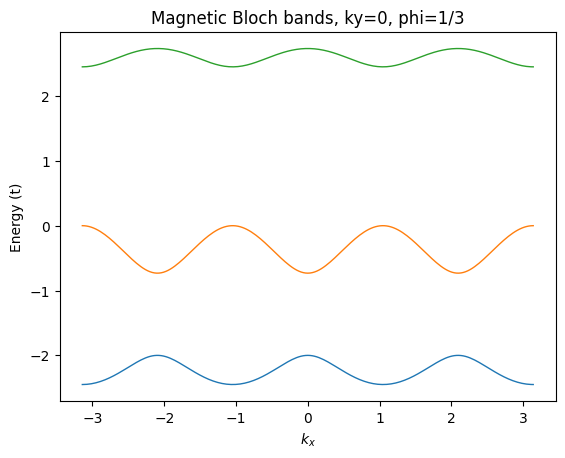

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def hofstadter_bulk_H(kx, ky, p=1, q=3, t=1.0):
    phi = p / q
    H = np.zeros((q, q), dtype=complex)
    for m in range(q):
        H[m, m] = 2 * t * np.cos(ky + 2*np.pi*phi*m)  # y-hopping (Landau gauge)
    for m in range(q):  # x-hopping
        H[m, (m+1) % q] += t * np.exp(1j*kx)
        H[(m+1) % q, m] += t * np.exp(-1j*kx)
    return H

# Plot bands along ky=0 cut for phi=1/3
p, q, t = 1, 3, 1.0
Nk = 201
kxs = np.linspace(-np.pi, np.pi, Nk)
Es = np.zeros((q, Nk))
for i, kx in enumerate(kxs):
    w, _ = np.linalg.eigh(hofstadter_bulk_H(kx, 0.0, p, q, t))
    Es[:, i] = np.sort(w)

plt.figure()
for n in range(q):
    plt.plot(kxs, Es[n], lw=1)
plt.xlabel(r"$k_x$")
plt.ylabel("Energy (t)")
plt.title(f"Magnetic Bloch bands, ky=0, phi={p}/{q}")
plt.show()


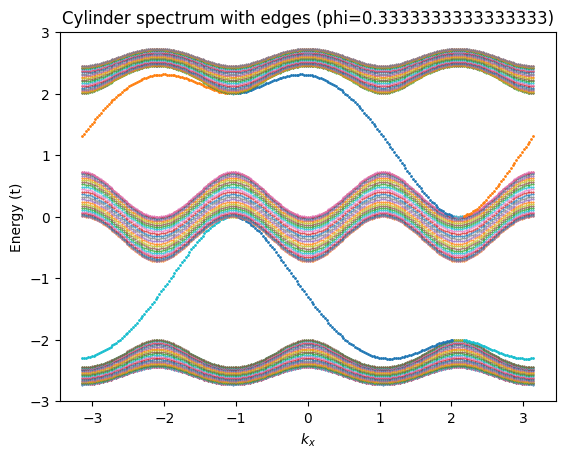

In [19]:
def harper_ribbon_H(kx, Ny=80, phi=1/3, t=1.0):
    H = np.zeros((Ny, Ny), dtype=complex)
    for y in range(Ny):
        H[y, y] = 2 * t * np.cos(kx + 2*np.pi*phi*y)
    for y in range(Ny-1):
        H[y, y+1] = t
        H[y+1, y] = t
    return H

def edge_tag(evec, Nx):
    prob = np.abs(evec)**2
    L = prob[:Nx//8].sum()
    R = prob[-Nx//8:].sum()
    if L > 0.6: return -1
    if R > 0.6: return +1
    return 0

Ny = 80
phi = 1/3
kxs = np.linspace(-np.pi, np.pi, 241)
bands, tags = [], []
for kx in kxs:
    w, v = np.linalg.eigh(harper_ribbon_H(kx, Ny=Ny, phi=phi))
    bands.append(w)
    tags.append([edge_tag(v[:,i], Ny) for i in range(len(w))])

bands = np.array(bands); tags = np.array(tags)
plt.figure()
for i in range(Ny):
    tg = tags[:, i]
    plt.plot(kxs[tg==0], bands[tg==0, i], '.', ms=1)  # bulk
    plt.plot(kxs[tg<0],  bands[tg<0,  i], '.', ms=2)  # left edge
    plt.plot(kxs[tg>0],  bands[tg>0,  i], '.', ms=2)  # right edge
plt.xlabel(r"$k_x$")
plt.ylabel("Energy (t)")
plt.title(f"Cylinder spectrum with edges (phi={phi})")
plt.show()
